In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cs
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle
from sklearn import (cross_validation, feature_selection, pipeline,
                     preprocessing, linear_model, grid_search)

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    return(TP, FP, TN, FN)


# In[16]:


dataset = pd.read_csv('diabetic_dataa.csv')



# In[17]:


dataset = pd.get_dummies(dataset)


# In[18]:


sample = dataset[dataset['diabetesMed'] == 1]
control = dataset[dataset['diabetesMed'] == 0]



# In[19]:


X_sample = sample.iloc[:, sample.columns != 'diabetesMed'].values
y_sample = sample.iloc[:, sample.columns =='diabetesMed'].values
X_control = control.iloc[:, control.columns != 'diabetesMed'].values
y_control = control.iloc[:, control.columns =='diabetesMed'].values



# In[21]:


X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size = 0.25, random_state = 0)
X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X_control, y_control, test_size = 0.25, random_state = 0)


# In[22]:


for i in range(2):
    X_train_sample = np.concatenate((X_train_sample,X_train_sample), axis = 0)
    X_test_sample = np.concatenate((X_test_sample,X_test_sample), axis = 0)
    y_train_sample = np.concatenate((y_train_sample,y_train_sample), axis = 0)
    y_test_sample = np.concatenate((y_test_sample,y_test_sample), axis = 0)


# In[23]:


sc = StandardScaler()
X_train_sample = sc.fit_transform(X_train_sample)
X_train_control = sc.fit_transform(X_train_control)
X_test_sample = sc.fit_transform(X_test_sample)
X_test_control = sc.fit_transform(X_test_control)


# In[24]:



# # In[25]:


# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# clf = ExtraTreesClassifier()
# clf = clf.fit(X,y)
# model = SelectFromModel(clf, prefit=True)
# X_train_sample = model.transform(X_train_sample)
# X_train_control = model.transform(X_train_control)
# X_test_sample = model.transform(X_test_sample)

# X_test_control = model.transform(X_test_control)

# importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center",picker = True)
# #plt.xticks(range(int(X.shape[1]/10)))
# #plt.xlim([-1, X.shape[1]])
# #plt.autofmt_xdate()
# plt.xticks(rotation=90)
# plt.savefig('filename.png',dpi = 1000)
# plt.show()
dataset.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,21,24,28,29,30,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


age  admission_type_id  discharge_disposition_id  admission_source_id  \
0    0                  6                        25                    1   
1    1                  1                         1                    7   
2    2                  1                         1                    7   
3    3                  1                         1                    7   
4    4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency              ...                \
0                  0                 0              ...                 
1                  0                 0              ...                 
2                  2                 0              ...                 
3                  0                 0              ...                 
4                  0                 0              ...                 

   glipizide-metformin_Steady  glimepiride-pioglitazone_0  \
0                           0                           1   
1                           0                           1   
2                           0                           1   
3                           0                           1   
4                           0                           1   

   glimepiride-pioglitazone_0  glimepiride-pioglitazone_Steady  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   metformin-rosiglitazone_0  metformin-rosiglitazone_0  \
0                          1                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          1                          0   

   metformin-rosiglitazone_Steady  metformin-pioglitazone_0  \
0                               0                         1   
1                               0                         1   
2                               0                         1   
3                               0                         1   
4                               0                         1   

   metformin-pioglitazone_0  metformin-pioglitazone_Steady  
0                         0                              0  
1                         0                              0  
2                         0                              0  
3                         0                              0  
4                         0                              0  

[5 rows x 112 columns]

In [11]:

X = dataset.iloc[:, sample.columns != 'diabetesMed'].values
y = dataset.iloc[:, sample.columns == 'diabetesMed'].values


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)
X_train_sample = model.transform(X_train_sample)
X_train_control = model.transform(X_train_control)
X_test_sample = model.transform(X_test_sample)

X_test_control = model.transform(X_test_control)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Feature ranking:
1. feature 91 (0.299979)
2. feature 33 (0.100869)
3. feature 14 (0.090541)
4. feature 93 (0.065230)
5. feature 56 (0.059378)
6. feature 58 (0.049230)
7. feature 60 (0.047578)
8. feature 35 (0.046909)
9. feature 62 (0.041895)
10. feature 49 (0.031229)


In [19]:
X =[]
Y = []
for f in range(10):
    Y.append(importances[indices[f]])
    X.append(dataset.columns.get_values()[indices[f]])
print(X)
print(Y)

['tolazamide_Up', 'A1Cresult_None', '1ange', 'insulin_Down', 'acetohexamide_Steady', 'glipizide_Down', 'glipizide_Up', 'metformin_Down', 'glyburide_Down', 'chlorpropamide_Up']
[0.2999791788352637, 0.10086883072655414, 0.09054084199825126, 0.06522981290847485, 0.059377723152915264, 0.049230466581749885, 0.04757834249580709, 0.04690894056379349, 0.0418948164776615, 0.031228618444411892]


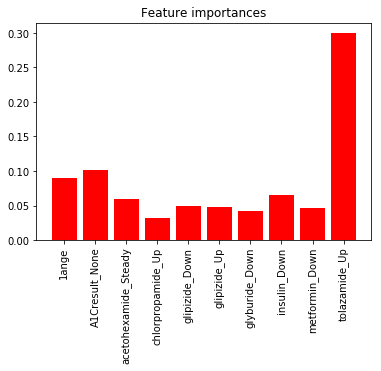

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(X, Y,color="r", align="center")
#plt.xticks(X, Y)
plt.xticks(rotation=90)
plt.show()

In [3]:
dataset.columns.get_values()[91]

'tolazamide_Up'

In [4]:
dataset.columns.get_values()[93]

'insulin_Down'

In [5]:
dataset.columns.get_values()[33]

'A1Cresult_None'

In [6]:
dataset.columns.get_values()[14]

'1ange'

In [7]:
dataset.columns.get_values()[58]

'glipizide_Down'

In [8]:
dataset.columns.get_values()[56]

'acetohexamide_Steady'

In [9]:
dataset.columns.get_values()[60]

'glipizide_Up'

In [10]:
dataset.columns.get_values()[35]

'metformin_Down'

In [11]:
dataset.columns.get_values()[67]

'tolbutamide_Steady'

In [12]:
dataset.columns.get_values()[62]

'glyburide_Down'

In [4]:
dataset.columns.get_values()[92]

'insulin_0'

In [6]:
dataset.columns.get_values()[71]

'pioglitazone_Up'

In [7]:
dataset.columns.get_values()[62]

'glyburide_Down'